## Import relevant packages

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## Import csv data files

In [86]:
df1 = pd.read_csv("politifact_with_bio_data_raw.csv")
df1.isna().sum()

Unnamed: 0             0
name                   0
claim_date             0
claim_source         138
claim                  0
issue                  0
accuracy_rating        0
id.bioguide        19460
id.wikipedia       18278
name.first         18278
name.middle        22474
name.last          18278
bio.gender         18278
bio.birthday       18307
type               18278
party              18281
start              18278
end                18278
state              19460
full_name          18278
dtype: int64

In [87]:
df = pd.read_csv("politifact_data.csv")
df.isna().sum()

Unnamed: 0.2           0
Unnamed: 0.1           0
Unnamed: 0             0
name                   0
claim_date             0
claim_source         138
claim                  0
issue                  0
accuracy_rating        0
id.bioguide        19460
id.wikipedia       18278
name.first         18278
name.middle        22474
name.last          18278
bio.gender         18278
bio.birthday       18307
type               18278
party              18281
start              18278
end                18278
state              19460
full_name          18278
accuracy               0
dtype: int64

Group the labels together

In [88]:
true = ['mostly-true', 'true']
false = ['barely-true', 'false', 'half-true', 'pants-fire']
df['accuracy'] = df['accuracy_rating'].apply(lambda x: 0 if x in false else 1) # assign numerical value to labels
df1['accuracy'] = df1['accuracy_rating'].apply(lambda x: 0 if x in false else 1) # assign numerical value to labels

Removal of unnecessary columns

In [89]:
df= df[['claim_date', 'issue', 'claim_source', 'claim','accuracy_rating']]

In [90]:
df.shape

(25923, 5)

## Analysis of data without bio data

In [91]:
df['accuracy'].value_counts().plot(kind='pie')
plt.show()
print(df['accuracy'].value_counts())

KeyError: 'accuracy'

There are 14473 mostly false data points and 11541 mostly true data points in df.

In [ ]:
num_unique_issues = df['issue'].nunique()
print(f'There are {num_unique_issues} unique issues.')

There are 87 unique issues.


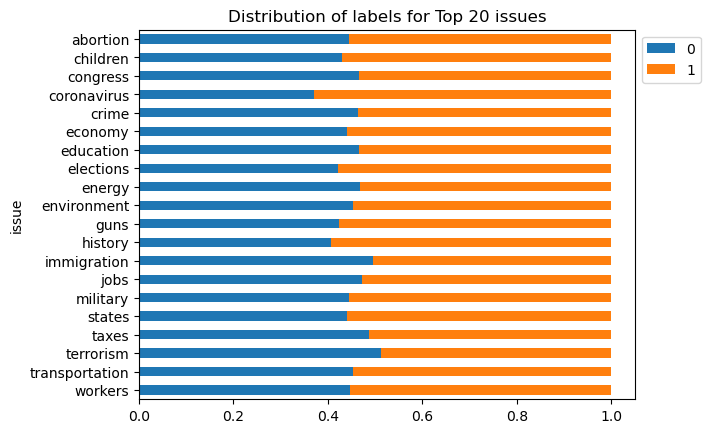

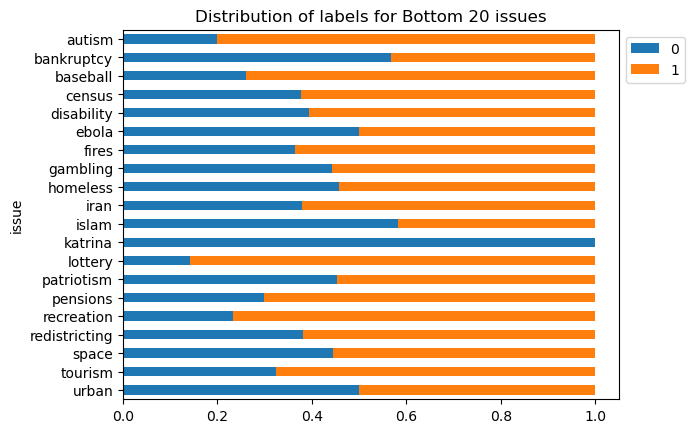

In [ ]:
top_20_issues = df.groupby('issue')['accuracy'].size().sort_values(ascending=False).head(20).index.sort_values()

# find bottom 20 issues based on freq counts
bottom_20_issues = df.groupby('issue')['accuracy'].size().sort_values(ascending=False).tail(20).index.sort_values()
temp = df[df['issue'].isin(top_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Top 20 issues')

temp = df[df['issue'].isin(bottom_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Bottom 20 issues')
plt.show()

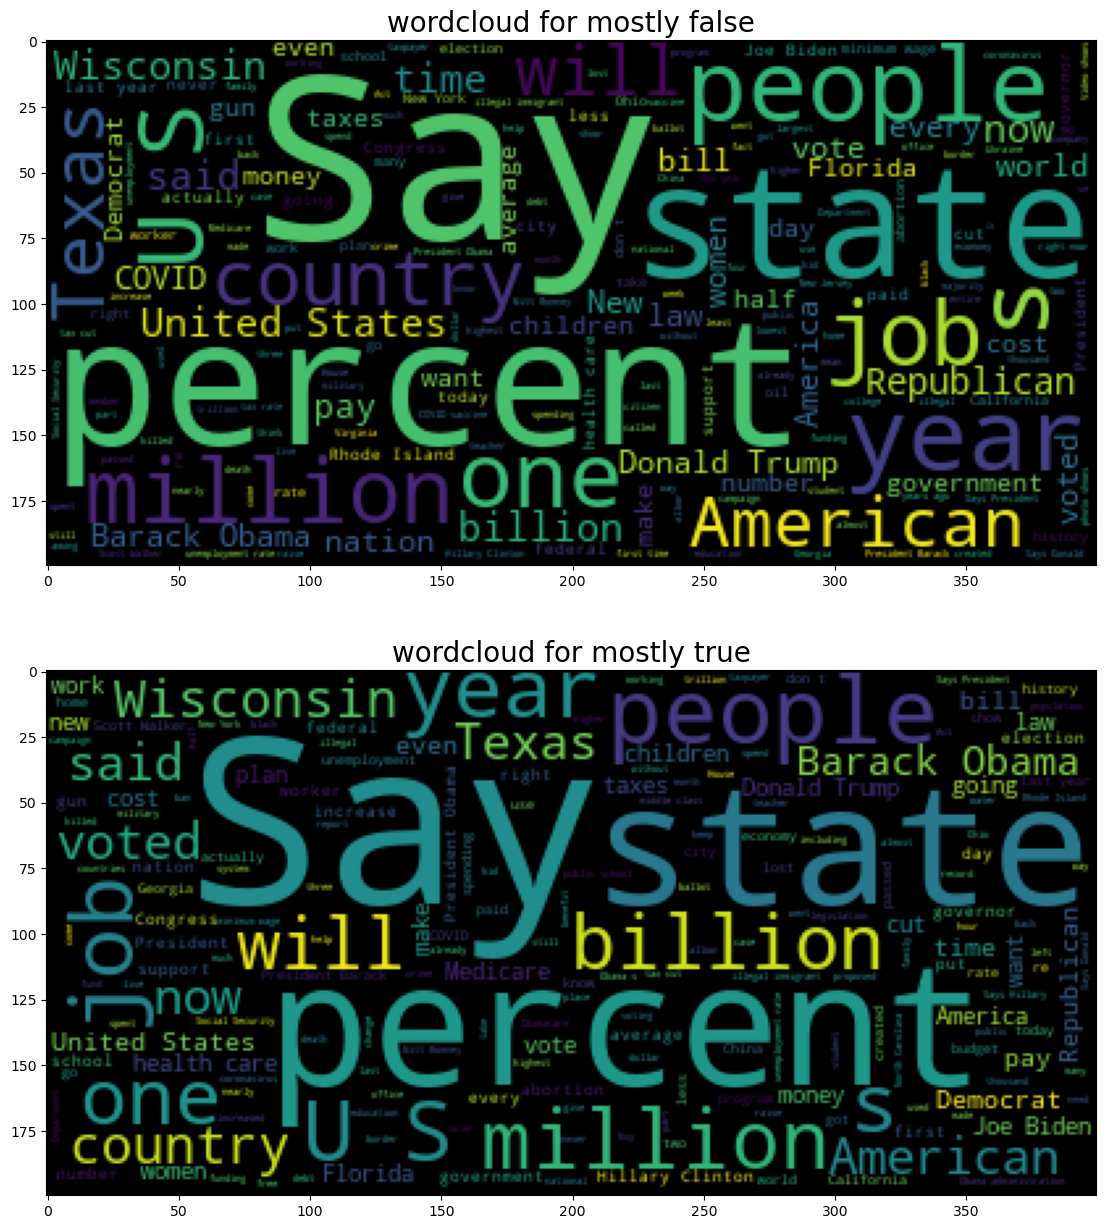

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
fig, axes = plt.subplots(2,1,figsize=(20,15))
wc_false = WordCloud(stopwords=STOPWORDS).generate(" ".join(df[df['accuracy']==1]['claim'].values))
wc_true = WordCloud(stopwords=STOPWORDS).generate(" ".join(df[df['accuracy']==0]['claim'].values))
axes[0].imshow(wc_false)
axes[0].set_title("wordcloud for mostly false",{'size': 20})
axes[1].imshow(wc_true)
axes[1].set_title("wordcloud for mostly true",{'size': 20})
plt.show()

## Analysis of data with bio data

replace the rows with missing claim source with 'Unknown'

In [ ]:
df1['claim_source'] = df1['claim_source'].fillna('Unknown')

In [ ]:
df1.drop(columns=['name.middle','name.last','name.first'],inplace=True)
df1.dropna(inplace=True)
df1.reset_index(inplace=True)

In [ ]:
df1.shape

(6431, 19)

Plots on the different features for df1 (with bio data)

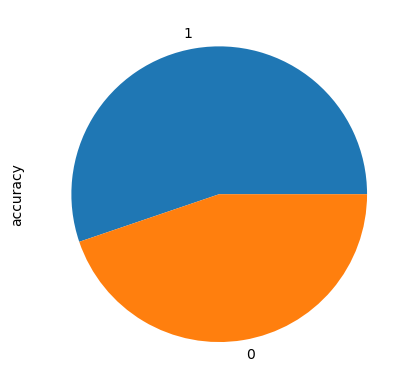

1    14314
0    11609
Name: accuracy, dtype: int64


In [92]:
df1['accuracy'].value_counts().plot(kind='pie')
plt.show()
print(df1['accuracy'].value_counts())

There are 3929 mostly false data points and 2467 mostly true data points in df1.

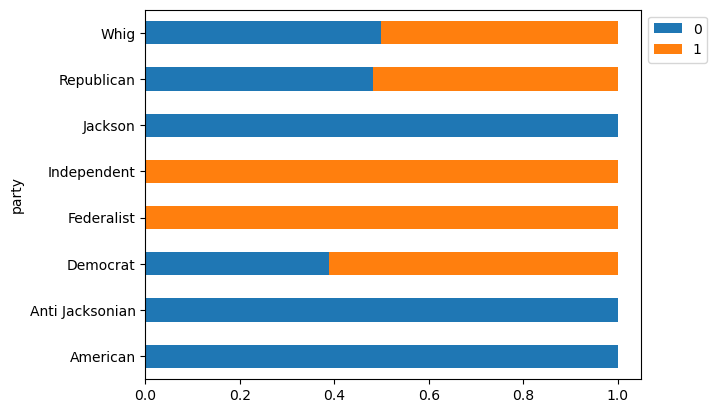

In [76]:
df1.groupby(by=['party'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

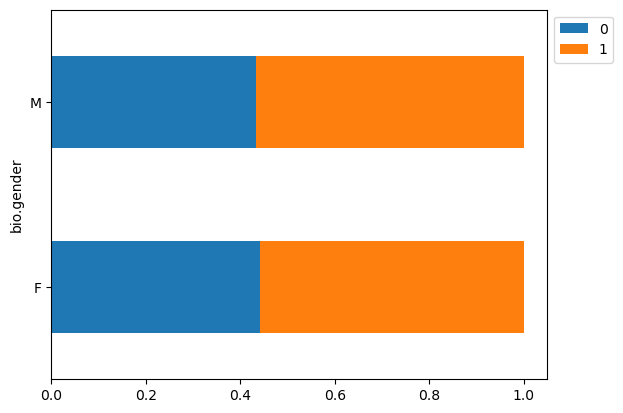

In [77]:
df1.groupby(by=['bio.gender'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

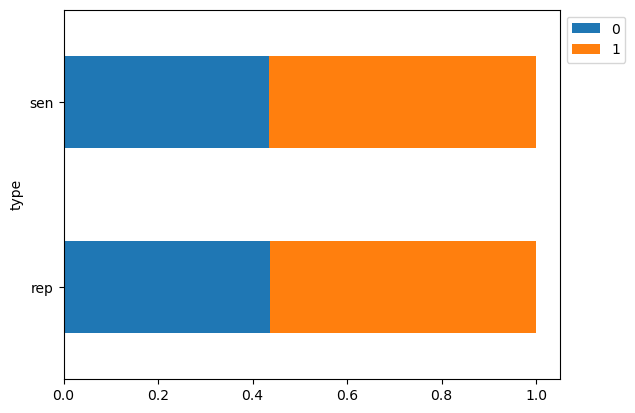

In [78]:
df1.groupby(by=['type'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [79]:
num_unique_issues = df1['issue'].nunique()
print(f'There are {num_unique_issues} unique issues.')

There are 85 unique issues.


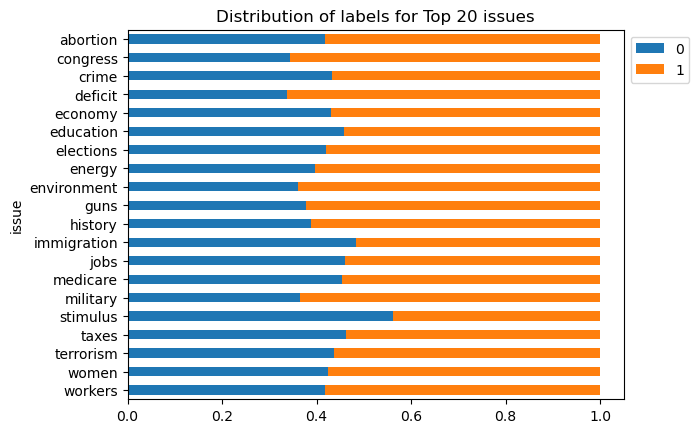

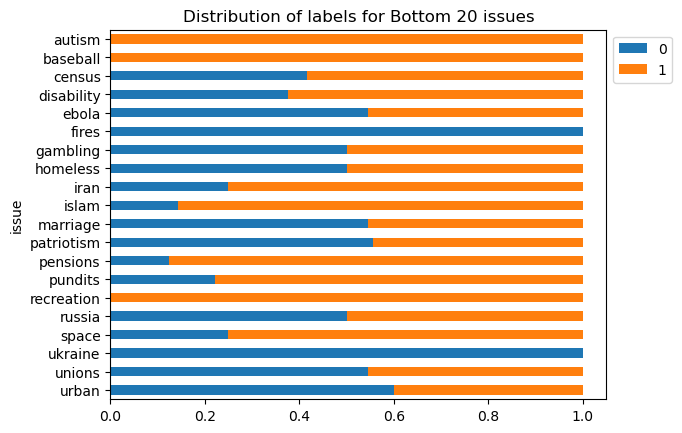

In [80]:
top_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).head(20).index.sort_values()

# find bottom 20 issues based on freq counts
bottom_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).tail(20).index.sort_values()
temp = df1[df1['issue'].isin(top_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Top 20 issues')

temp = df1[df1['issue'].isin(bottom_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Bottom 20 issues')
plt.show()

Output dataframe as CSV files

In [83]:
df1.to_csv("politifact_with_bio_data.csv")

In [84]:
df.to_csv("politifact_data.csv")